# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [2]:
# Q1 (code)
!pip install tomotopy  #make sure i run installations smoothly i input them in separate cells


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 38.9 MB/s eta 0:00:00


In [3]:
!pip install little-mallet-wrapper


In [4]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [6]:
# Q2 (code)
df1 = pd.read_csv('sanders_tweets.csv')  #upload the files on google colab and combine two files
df2 = pd.read_csv('trump_tweets.csv')
combined_df = pd.concat([df1, df2], ignore_index=True)

### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [7]:
# Q3 (code)
import re
training_data = []  #initialize lists
original_texts = []
titles = []

for index, row in combined_df.iterrows():  #iterate over each tweet in combined_df
  text = row['Content'].lower()    #convert text to lowercase
  processed_text = little_mallet_wrapper.process_string(text, numbers='remove')  #process text using little_mallet_wrapper
  # Tip: add the following line to remove URLS and user mentions
  processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t.co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)
  training_data.append(processed_text)
  original_texts.append(row['Content'])
  title = f"{row['Username']}_{row['TweetId']}"   #create title identifying author and tweet ID
  titles.append(title)

In [8]:
len(training_data), len(original_texts), len(titles) #check len to make sure all the codes right above

(30371, 30371, 30371)

In [9]:
for i in range(5):  #print the top 5 lines of training_data to check text cleaning
    print(training_data[i])

wealth increase past months billion elon musk billion jeff bezos billion walton family billion bill gates billion mark zuckerberg year increase minimum wage must tax rich raise minimum wage least
amidst massive income wealth inequality tens millions americans working starvation wages need raise minimum wage living wage least hour excuses need act
resources skills techniques get rid poverty question whether nation martin luther king  x vksfnvx
surviving attempt life russian activist alexei navalny detained bravely returning russia today call release united states must stand fighting corruption working democracy around world
president elect biden covid rescue plan begin provide people much needed support direct payments minimum wage look forward working colleagues congress urgently provide bold relief working families  i


## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [10]:
# Q4 (code)
num_topics = 5       #number of topics to return
num_topic_words = 10  #numer of topic words to print out
model = tp.LDAModel(k=num_topics)   #intialize the model

for text in training_data:  #add each document to the model, after splitting it up into words
    model.add_doc(text.strip().split())
print("Topic Model Training...\n\n")

iterations = 10    #iterate over the data 10 times
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.3491209650646
Iteration: 10	Log-likelihood: -9.160407956158862
Iteration: 20	Log-likelihood: -8.998590298258
Iteration: 30	Log-likelihood: -8.904215654427562
Iteration: 40	Log-likelihood: -8.86627537848133
Iteration: 50	Log-likelihood: -8.83924363397721
Iteration: 60	Log-likelihood: -8.820379674724071
Iteration: 70	Log-likelihood: -8.808082993893043
Iteration: 80	Log-likelihood: -8.795991677439574
Iteration: 90	Log-likelihood: -8.78790987011809


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [11]:
# Q5a (code)

print("\nTopic Model Results:\n\n") #Print out top 10 words for each topic

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

great thank vote state president maga new big total job

✨Topic 1✨

president trump today american united people states whitehouse must war

✨Topic 2✨

people must health care americans tax workers need american country

✨Topic 3✨

trump president democrats biden impeachment election house court fbi campaign

✨Topic 4✨

news fake great people country many would media much big



In [25]:
# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

✨Topic 0✨:

Keywords: great thank vote state president maga new big total job

This topic may be centered around political campaigns and elections, with discussions on voting, presidential leadership, and economic issues like jobs.

✨Topic 1✨:

Keywords: president trump today american united people states whitehouse must war

This topic may be about actions and policies of President Trump, including domestic, international matters like war.

✨Topic 2✨:

Keywords: people must health care americans tax workers need american country

This topic may be about social and economic concerns affecting Americans, such as healthcare, taxes, and the welfare of workers and the nation as a whole.

✨Topic 3✨:

Keywords: trump president democrats biden impeachment election house court fbi campaign

This topic may be about political events and controversies surrounding the Trump administration, Democratic Party, elections, and legal proceedings.

✨Topic 4✨:

Keywords: news fake great people country many would media much big

This topic may be about media and public discourse, addressing issues like fake news, media credibility, and their impact on public perception and national identity.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [12]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5220725978910924 
Per Topic: [0.49491936042904855, 0.47146512418985365, 0.604377481341362, 0.5355518907308578, 0.5040491327643395]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

In [14]:
# Q6 (words)

#Q6 Answer
✨Initial Model✨:

Number of topics: 15, Avg. Coherence score (c_v): 0.575

✨Reduce number of topics✨:

1. number of topics:10, Avg. c_v: 0.562;  

2. number of topics: 5, Avg. c_v: 0.522;

As reducing the number of topics, i notice that there's a slight decrease in the Average Coherence Score, possibly because the model as fewer topics to capture the differences in texts.

✨Increase number of topics✨:

number of topics: 20, Avg. c_v: 0.586;

As increasing the number of topics, i notice that there's a slight increase in the Average Coherence Score, possibly because the model as more topics to capture the differences in texts.


### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

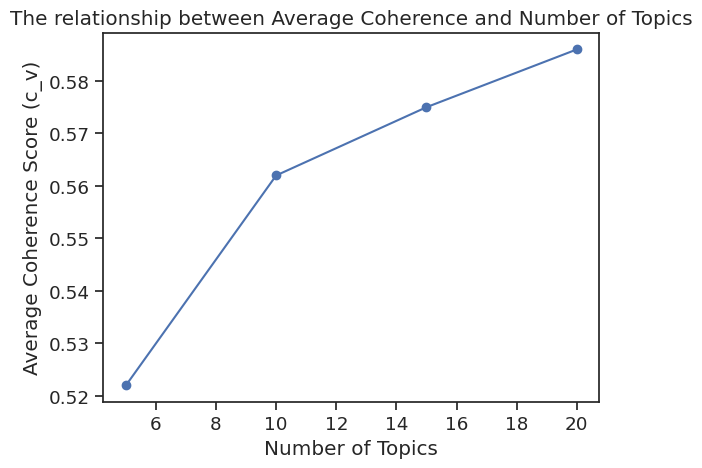

In [15]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
import matplotlib.pyplot as plt

def plot_coherence_vs_topics(num_topics_list, avg_coherence_list):
    plt.plot(num_topics_list, avg_coherence_list, marker='o')
    plt.title('The relationship between Average Coherence and Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence Score (c_v)')
    plt.show()

num_topics_list = [5, 10, 15, 20]   #input the model results i got
avg_coherence_list = [0.522, 0.562, 0.575, 0.586]

plot_coherence_vs_topics(num_topics_list, avg_coherence_list)

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

In [18]:
# Q7a (code)
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]  #calculate the topic distribution

#get top documents for topic 2 and 3
selected_topic_number = 2  #select topic 2 from modeling result
selected_topic = topics[selected_topic_number]
top_documents_per_topic = {}
sorted_documents = sorted(enumerate(topic_distributions), key=lambda x: x[1][2], reverse=True)  #sort documents by their probability of belonging to the selected topic
top_documents = sorted_documents[:5]       #get the top 5 documents for the selected topic
top_documents_per_topic[selected_topic_number] = top_documents #store the top documents for the selected topic
for selected_topic_number, top_documents in top_documents_per_topic.items():
    print(f"Top documents for Topic {selected_topic_number}:")
    for doc_index, doc_prob in top_documents:
      print(f"Document ID: {doc_index}, Probability: {round(doc_prob[selected_topic_number], 3)}, Title: {titles[doc_index]}, Content: {original_texts[doc_index][:50]}...")   #limitation of 50

selected_topic_number = 3  #select topic 3 from modeling result
selected_topic = topics[selected_topic_number]
top_documents_per_topic = {}
sorted_documents = sorted(enumerate(topic_distributions), key=lambda x: x[1][3], reverse=True)
top_documents = sorted_documents[:5]
top_documents_per_topic[selected_topic_number] = top_documents

for selected_topic_number, top_documents in top_documents_per_topic.items():
    print(f"Top documents for Topic {selected_topic_number}:")
    for doc_index, doc_prob in top_documents:
      print(f"Document ID: {doc_index}, Probability: {round(doc_prob[selected_topic_number], 3)}, Title: {titles[doc_index]}, Content: {original_texts[doc_index][:50]}...")


Top documents for Topic 2:
Document ID: 1379, Probability: 0.9670000076293945, Title: SenSanders_1168227036155928576, Content: U.S. bombs, logistical support, and intelligence f...
Document ID: 161, Probability: 0.9660000205039978, Title: SenSanders_1310606264184041472, Content: Trump's not alone. Over a three-year period, the t...
Document ID: 1369, Probability: 0.9660000205039978, Title: SenSanders_1169748597186809856, Content: Addiction is a disease, not criminal activity.

He...
Document ID: 2112, Probability: 0.9660000205039978, Title: SenSanders_1075412067744657408, Content: Medicare for All is not a crazy idea.

What's craz...
Document ID: 409, Probability: 0.9649999737739563, Title: SenSanders_1270000771132731392, Content: Bills are piling up, rent is due, millions are job...
Top documents for Topic 3:
Document ID: 15065, Probability: 0.9679999947547913, Title: @realDonaldTrump_1127627180186451968, Content:  RT @TheRightMelissa: @RealCandaceO Yap Candace! N...
Document ID: 1584

In [19]:
# Q7b (words)

#Q7b answer

Top documents about Topic 2 and Topic 3 show great differences. It is noticeable that top 5 documents for topic 2 are all from @SenSanders, while for topic 3 are all from @realDonaldTrump. I retrained the model and adjusted top documents number into 10, and the reuslt is still the same.

For Topic 2, the top documents seem to reflect views and policies aligned with Bernie Sanders. They discuss issues such as healthcare, addiction treatment, and economic concerns. These topics are more representative of Sanders' views because they emphasize progressive policies related to healthcare, social welfare, and economic justice, which are key aspects of his political platform.

For Topic 3, the top documents appear to reflect PresidentTrump's perspective. They include tweets about political adversaries, economic policies, and international events under his administration's policies.

Thus in conclusion, Topic 2 is more representative of Bernie Sanders' views, while Topic 3 appears to be more closely associated with President Donald Trump's views.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [20]:
# Crete a sample of tweets
from random import sample

target_labels = sample(titles,100)

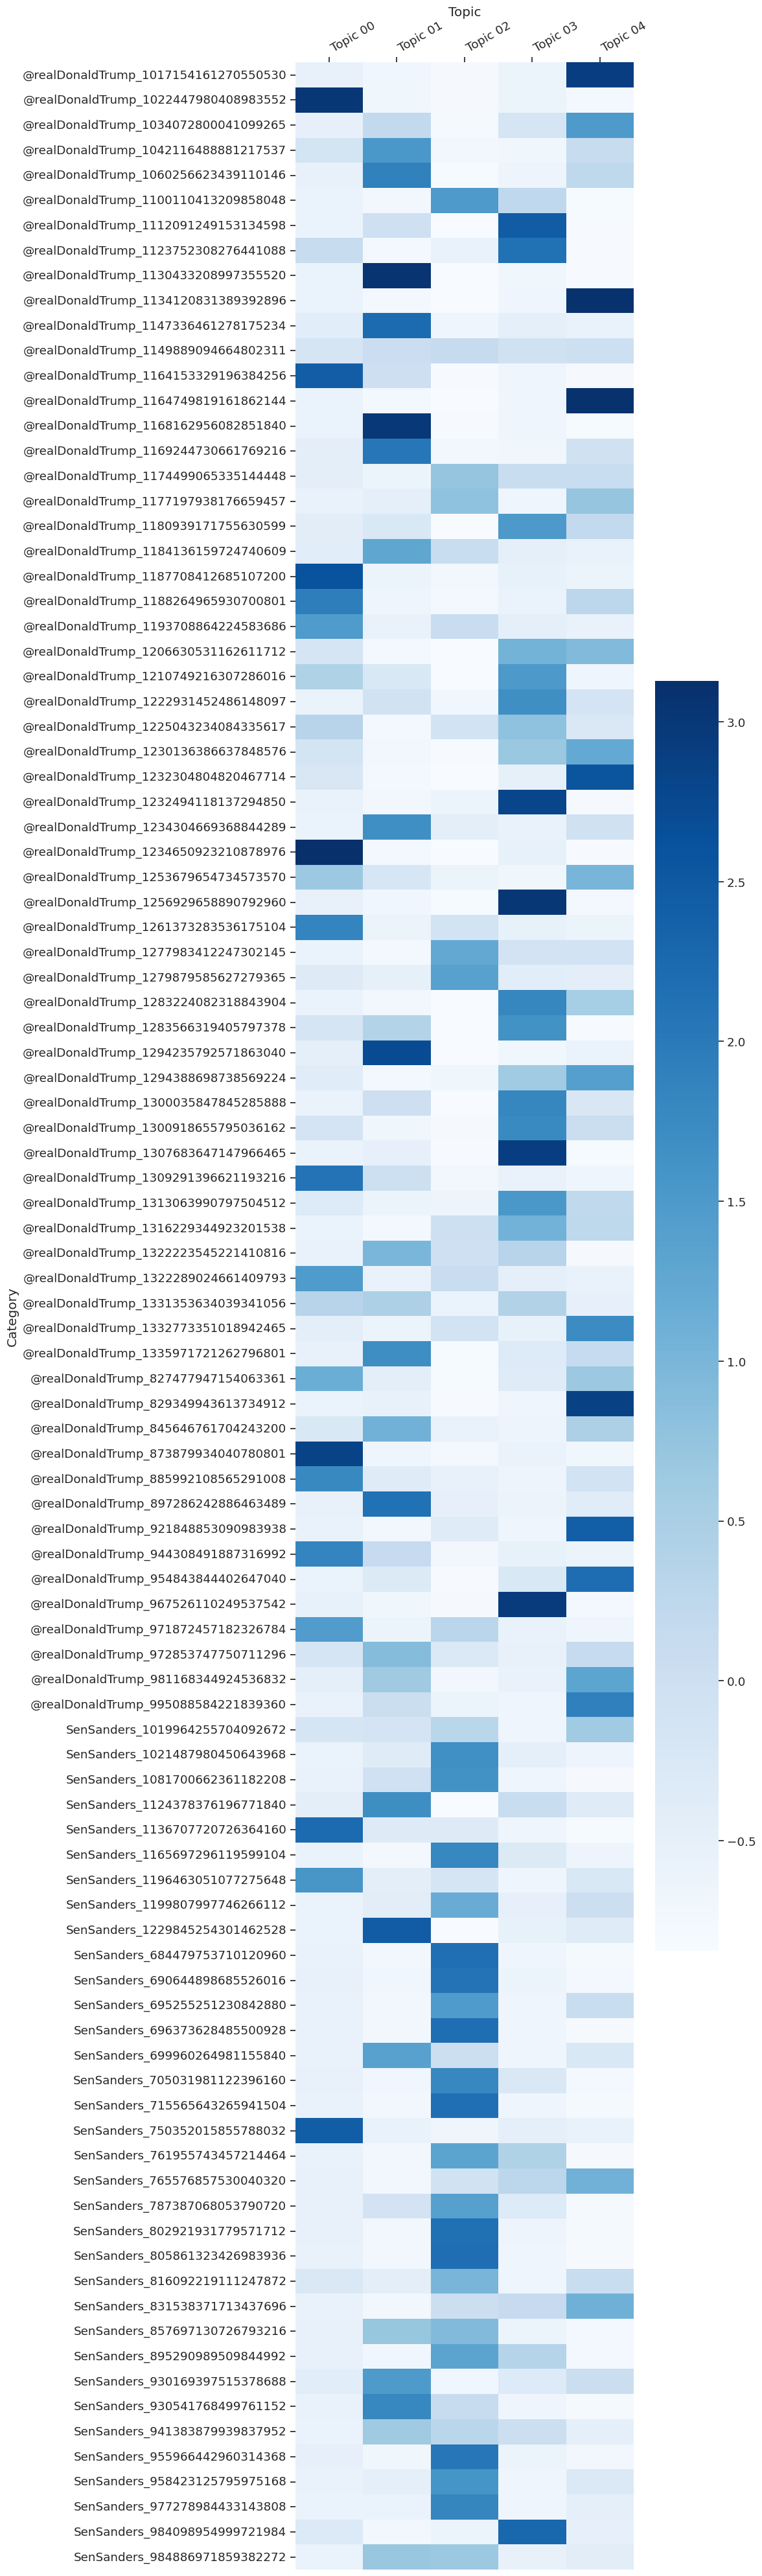

In [35]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    dicts_to_plot = []  #combine the labels and distributions into a list of dictionaries.
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2)})

    df_to_plot = pd.DataFrame(dicts_to_plot)  #create a dataframe, format it for the heatmap function, and normalize the columns.
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    if dim:   #show the final plot
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

plot_categories_by_topics_heatmap(labels=titles,
                                  topic_distributions=topic_distributions,
                                  topic_keys=topics,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                  dim=(12,40))   #adjust Y parameter to visualize the whole 100 random smaple

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

In [24]:
# Q9 (words)

#Q9 answer

From the heatmap, it is easy to notice that in the column Topic2, @SenSanders' posts have darker patterns than the pattern color in @realDonalTrump's posts, which reveals that Bernie Sanders is more representative on "healthcare, addiction treatment, and economy" issues that DT. While in Topic 3, more darker patterns are distributed in Trump's posts than in Sander's, which indicates that Trump is more representative on "Trump administration and election" topic. The heatmap result aligns with the topic distribution analysis in Q7.

Besides, it is obvious that in Bernie Sander's posts, light color patterns take large proportion among Topic 0, 3 and 4, which maybe indicate that Sanders' posts are less connected with topics about Trump administration and election.

However, in this heatmap the sample number from each user's posts is imbalanced, so it still needs further exploration for  a convincing conclusion.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

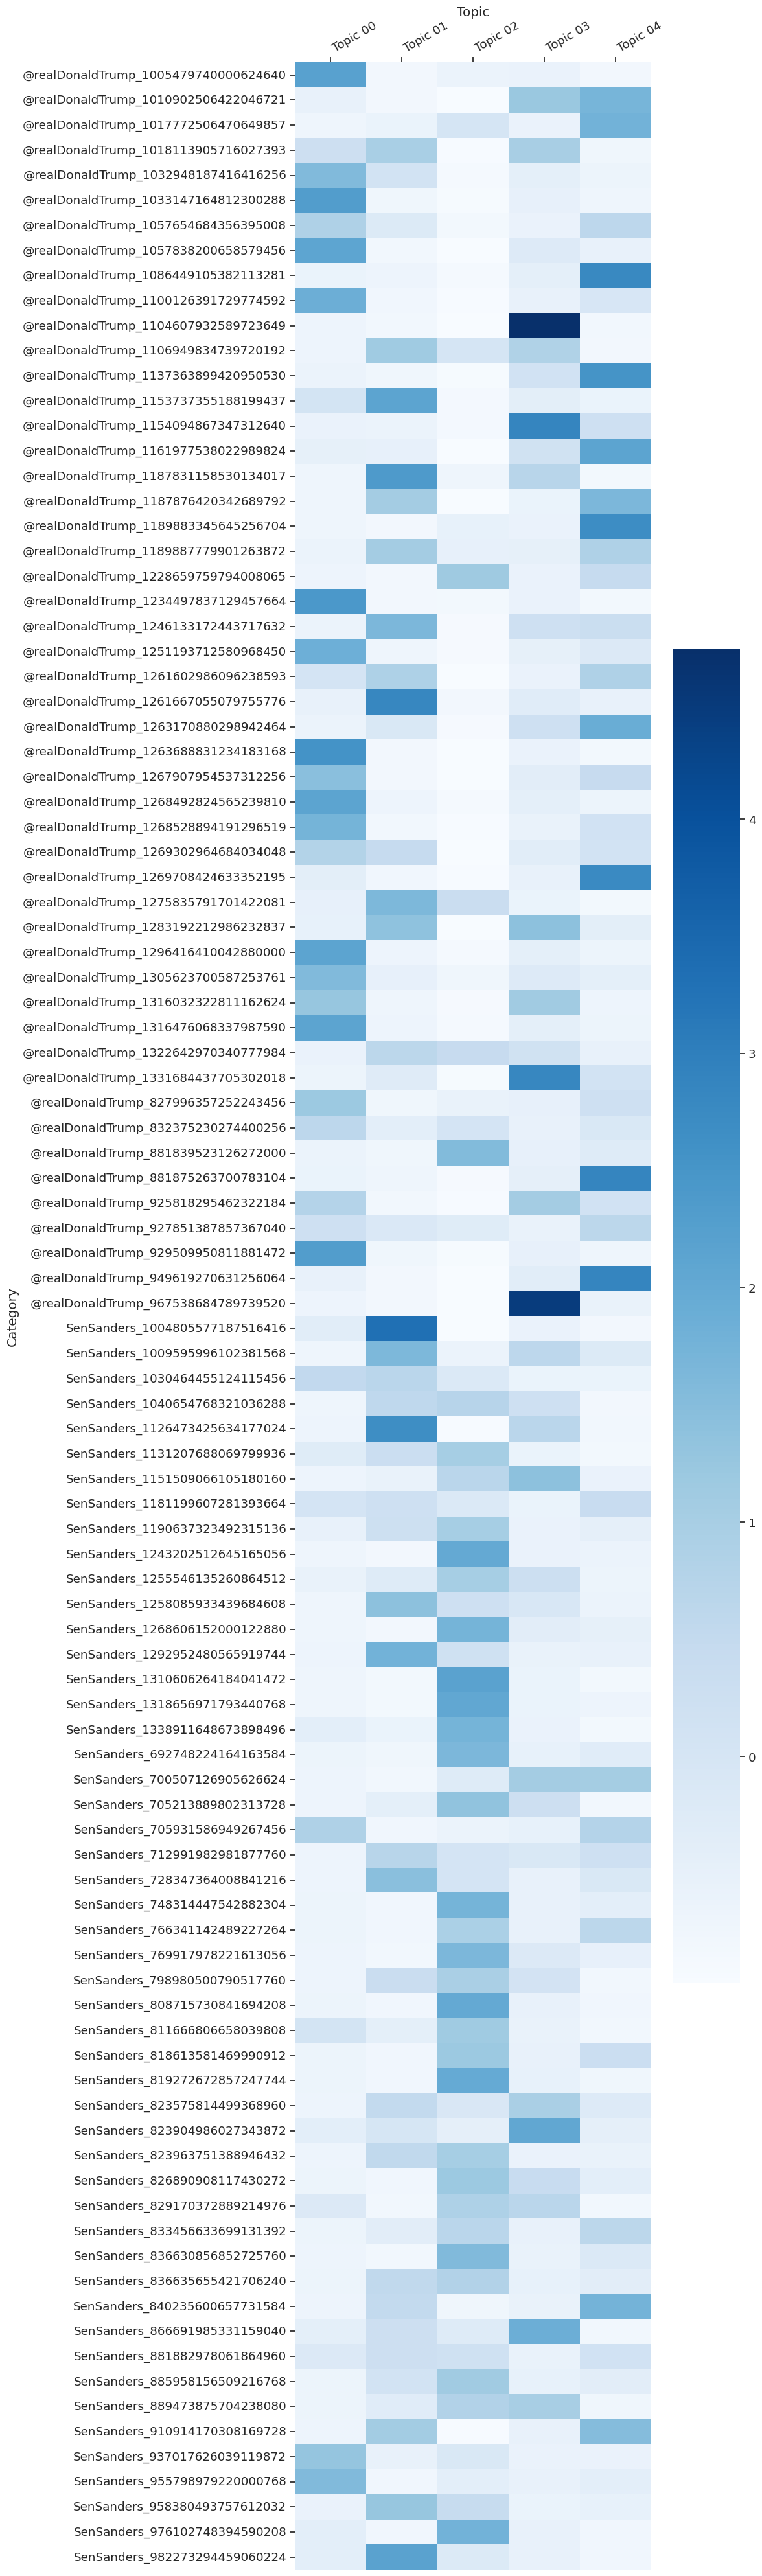

In [37]:
# X2 (code)
import random

def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map=sns.cm.rocket_r,
                                      dim=None):

    dicts_to_plot = []   #combine the labels and distributions into a list of dictionaries
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2)})

    df_to_plot = pd.DataFrame(dicts_to_plot)  #create a dataframe, format it for the heatmap function, and normalize the columns
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col = (df_wide - df_wide.mean()) / df_wide.std()

    if dim:   #show the final plot
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

trump_titles = [title for title in titles if '@realDonaldTrump' in title]  #filter titles corresponding to Trump and Sanders tweets
sanders_titles = [title for title in titles if 'SenSanders' in title]

trump_sample = random.sample(trump_titles, 50)   #randomly sample 50 titles from each set
sanders_sample = random.sample(sanders_titles, 50)
balanced_sample = trump_sample + sanders_sample   #combine the samples

plot_categories_by_topics_heatmap(labels=titles,
                                  topic_distributions=topic_distributions,
                                  topic_keys=topics,
                                  target_labels=balanced_sample,
                                  color_map='Blues',
                                  dim=(12, 40))   #adjust Y parameter to visualize the whole 100 random smaple


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [38]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)

In [45]:
topic_results = []
for title, topic_distribution in zip(titles, topic_distributions):
    topic_results.append({'document': title, 'topic_distribution': topic_distribution})

df = pd.DataFrame(topic_results)   #output as csv. file
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]
df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index=df.index)
df = df.drop('topic_distribution', axis='columns')

df_values = df.drop('document', axis='columns').values   #exclude 'document' before normalizing
df_norm_col = (df_values - df_values.mean()) / df_values.std()

topic_summary = pd.DataFrame(df_norm_col, columns=column_names).describe()  #calculate summary statistics for each topic

print("Summary Statistics for Each Topic:")  #print the summary statistics
print(topic_summary)


Summary Statistics for Each Topic:
       Topic 0 great thank vote state  Topic 1 president trump today american  \
count                    30351.000000                            30351.000000   
mean                        -0.091096                               -0.113389   
std                          0.983486                                0.885246   
min                         -0.776761                               -0.774868   
25%                         -0.742067                               -0.733025   
50%                         -0.607190                               -0.556056   
75%                          0.183406                                0.223026   
max                          3.078855                                3.050492   

       Topic 2 people must health care  \
count                     30351.000000   
mean                          0.059018   
std                           1.091710   
min                          -0.773688   
25%                      